In [62]:
import pandas as pd
from matplotlib import pyplot as plt

### Read in the match points from 2011-2021 for grand-slam tournaments

In [63]:
points_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-points/2011-combined-points.csv", encoding='unicode_escape', low_memory=False)
match_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/2011-combined-matches.csv", encoding='unicode_escape', low_memory=False)
combined = pd.merge(points_2011, match_2011, on="match_id", how="inner")
for i in range(2012, 2022):
    points = pd.read_csv(f"../data/grand-slam-point-data/combined-points/{i}-combined-points.csv", encoding='unicode_escape', low_memory=False)
    match = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/{i}-combined-matches.csv", encoding='unicode_escape', low_memory=False)
    cur_year = pd.merge(points, match, on="match_id", how="inner")
    combined = pd.concat([combined, cur_year], sort=True)

points = combined
points

,ElapsedTime,GameNo,GameWinner,History,P1Ace,P1BreakPoint,P1BreakPointMissed,P1BreakPointWon,P1DistanceRun,P1DoubleFault,...,player1_new,player1id,player2,player2_new,player2id,round,slam,status,winner,year
0,00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,R Nadal,atpn409,Marcos Daniel,M Daniel,atpd339,Round 1,ausopen,Retired,1.0,2011
1,0:00:00,1.0,0.0,21020.0,0.0,0.0,0.0,0.0,NaN,0.0,...,R Nadal,atpn409,Marcos Daniel,M Daniel,atpd339,Round 1,ausopen,Retired,1.0,2011
2,0:00:23,1.0,0.0,22020.0,0.0,0.0,0.0,0.0,NaN,0.0,...,R Nadal,atpn409,Marcos Daniel,M Daniel,atpd339,Round 1,ausopen,Retired,1.0,2011
3,0:00:59,1.0,0.0,22020.0,0.0,0.0,0.0,0.0,NaN,0.0,...,R Nadal,atpn409,Marcos Daniel,M Daniel,atpd339,Round 1,ausopen,Retired,1.0,2011
4,0:01:57,1.0,1.0,21022.0,0.0,1.0,0.0,1.0,NaN,0.0,...,R Nadal,atpn409,Marcos Daniel,M Daniel,atpd339,Round 1,ausopen,Retired,1.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114556,3:20:13,9.0,0.0,21410.0,0.0,1.0,1.0,0.0,27.687,0.0,...,N Djokovic,NaN,Matteo Berrettini,M Berrettini,NaN,NaN,wimbledon,NaN,NaN,2021
114557,3:20:44,9.0,0.0,12410.0,0.0,0.0,0.0,0.0,28.870,0.0,...,N Djokovic,NaN,Matteo Berrettini,M Berrettini,NaN,NaN,wimbledon,NaN,NaN,2021
114558,3:21:37,9.0,0.0,21010.0,0.0,1.0,1.0,0.0,31.068,0.0,...,N Djokovic,NaN,Matteo Berrettini,M Berrettini,NaN,NaN,wimbledon,NaN,NaN,2021
114559,3:22:30,9.0,0.0,21020.0,0.0,0.0,0.0,0.0,14.625,0.0,...,N Djokovic,NaN,Matteo Berrettini,M Berrettini,NaN,NaN,wimbledon,NaN,NaN,2021


P1BreakPoint == 1 if P1 is receiveing and is one point from winning the game ("breaking" the opponent's serve point)

In [64]:
points.columns

Index(['ElapsedTime', 'GameNo', 'GameWinner', 'History', 'P1Ace',
       'P1BreakPoint', 'P1BreakPointMissed', 'P1BreakPointWon',
       'P1DistanceRun', 'P1DoubleFault', 'P1FirstSrvIn', 'P1FirstSrvWon',
       'P1ForcedError', 'P1GamesWon', 'P1Momentum', 'P1NetPoint',
       'P1NetPointWon', 'P1PointsWon', 'P1Score', 'P1SecondSrvIn',
       'P1SecondSrvWon', 'P1TurningPoint', 'P1UnfErr', 'P1Winner', 'P2Ace',
       'P2BreakPoint', 'P2BreakPointMissed', 'P2BreakPointWon',
       'P2DistanceRun', 'P2DoubleFault', 'P2FirstSrvIn', 'P2FirstSrvWon',
       'P2ForcedError', 'P2GamesWon', 'P2Momentum', 'P2NetPoint',
       'P2NetPointWon', 'P2PointsWon', 'P2Score', 'P2SecondSrvIn',
       'P2SecondSrvWon', 'P2TurningPoint', 'P2UnfErr', 'P2Winner',
       'PointNumber', 'PointServer', 'PointWinner', 'Rally', 'RallyCount',
       'ReturnDepth', 'ServeDepth', 'ServeIndicator', 'ServeNumber',
       'ServeWidth', 'Serve_Direction', 'ServingTo', 'SetNo', 'SetWinner',
       'Speed_KMH', 'Speed_MPH

In [65]:
real_points = points[points['PointWinner'].ge(1)]

In [66]:
real_points[real_points["PointServer"].isna()]["match_id"].nunique()

0

In [67]:
real_points["PointServer"]

1         2.0
2         2.0
3         2.0
4         2.0
5         1.0
         ... 
114556    2.0
114557    2.0
114558    2.0
114559    2.0
114560    2.0
Name: PointServer, Length: 1015928, dtype: float64

In [68]:
# P1 has a breakpoint when P2 is serving, and P1 is up 0-40, 15-40, 30-40, or 40-AD
p1_breakpoint =\
  (real_points["PointServer"] == 2) &\
  (((real_points["P1Score"] == "40") &
    (real_points["P2Score"] != "40") &
    (real_points["P2Score"] != "AD")) |
  (real_points["P1Score"] == "AD"))
p2_breakpoint =\
  (real_points["PointServer"] == 1) &\
  (((real_points["P2Score"] == "40") &
    (real_points["P1Score"] != "40") &
    (real_points["P1Score"] != "AD")) |
  (real_points["P2Score"] == "AD"))
real_points.loc[:, "P1BreakPoint"] = p1_breakpoint.shift(1, fill_value=False) # P1Score is P1's score after the point is played
real_points.loc[:, "P2BreakPoint"] = p2_breakpoint.shift(1, fill_value=False)

C:\Users\anhmi\miniconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [69]:
p1_breakpoint.shift(1, fill_value=False)

1         False
2         False
3         False
4          True
5         False
          ...  
114556     True
114557    False
114558     True
114559    False
114560     True
Length: 1015928, dtype: bool

In [70]:
real_points[["P1Score", "P2Score", "PointServer", "PointWinner", "P1BreakPoint"]][:6]

,P1Score,P2Score,PointServer,PointWinner,P1BreakPoint
1,15,0,2.0,1.0,False
2,30,0,2.0,1.0,False
3,40,0,2.0,1.0,False
4,0,0,2.0,1.0,True
5,15,0,1.0,1.0,False
6,30,0,1.0,1.0,False


In [71]:
bp_groups = real_points.groupby(by=["player1_new", "player2_new", "P1BreakPoint", "P2BreakPoint", "PointWinner", "PointServer"])
counts_by_bp = bp_groups.size().reset_index(name="count")

In [72]:
unique_players = set(counts_by_bp["player1_new"].unique().tolist() + counts_by_bp["player2_new"].unique().tolist())
player_bps_dict = dict()
for p in unique_players:
  player_bps_dict[p] = {
    'receive_nobreak_won': 0,
    'receive_nobreak_faced': 0,
    'serve_nobreak_won': 0,
    'serve_nobreak_faced': 0,
    'receive_break_won': 0,
    'receive_break_faced': 0,
    'serve_break_won': 0,
    'serve_break_faced': 0,
  }

In [74]:
print('\n'.join(sorted(unique_players)))
print(len(unique_players))

A Arnaboldi
A Balazs
A Beck
A Bedene
A Bogomolov Jr.
A Bolt
A Bublik
A Cazaux
A Clement
A Davidovich Fokina
A De Greef
A De Minaur
A Dolgopolov
A Falla
A Gensse
A Giannessi
A Golubev
A Gonzalez
A Haider-Maurer
A Harris
A Hoang
A Karatsev
A Krajicek
A Kudryavtsev
A Kuznetsov
A Mannarino
A Martin
A Menendez Maceiras
A Michon
A Molcan
A Montanes
A Muller
A Murray
A Nedovyesov
A Olivetti
A Pavic
A Pavlasek
A Popyrin
A Ramos-Vinolas
A Rinderknech
A Roddick
A Rublev
A Seppi
A Tabilo
A Ungur
A Vatutin
A Veic
A Vukic
A Ward
A Weintraub
A Whittington
A Zverev
A de Minaur
B Baker
B Becker
B Bonzi
B Coric
B Fratangelo
B Kavcic
B Klahn
B Klein
B Mitchell
B Mott
B Nakashima
B Paire
B Phau
B Reynolds
B Rola
B Schnur
B Tomic
B Van De Zandschulp
B Zapata Miralles
C Alcaraz
C Altamirano
C Ball
C Berlocq
C Eubanks
C Garin
C Harrison
C Hemery
C Ilkel
C Lindell
C Moutet
C Niland
C Norrie
C O'Connell
C Ruud
C Stebe
C Taberner
D Altmaier
D Brands
D Brown
D Cox
D Dzumhur
D Elahi Galan
D Evans
D Ferrer
D Gala

In [75]:
for row in counts_by_bp.to_dict("records"):
  if row["P1BreakPoint"]:
    if row["PointWinner"] == 1:
      player_bps_dict[row["player1_new"]]["receive_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["receive_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["serve_break_faced"] += row["count"]
    else:
      player_bps_dict[row["player2_new"]]["serve_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["receive_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["serve_break_faced"] += row["count"]
  elif row["P2BreakPoint"]:
    if row["PointWinner"] == 1:
      player_bps_dict[row["player1_new"]]["serve_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["serve_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["receive_break_faced"] += row["count"]
    else:
      player_bps_dict[row["player2_new"]]["receive_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["serve_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["receive_break_faced"] += row["count"]
  else:
    if row["PointWinner"] == 1:
      if row["PointServer"] == 1:
        player_bps_dict[row["player1_new"]]["serve_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["serve_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["receive_nobreak_faced"] += row["count"]
      else:
        player_bps_dict[row["player1_new"]]["receive_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["receive_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["serve_nobreak_faced"] += row["count"]
    else:
      if row["PointServer"] == 1:
        player_bps_dict[row["player2_new"]]["receive_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["serve_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["receive_nobreak_faced"] += row["count"]
      else:
        player_bps_dict[row["player2_new"]]["serve_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["receive_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["serve_nobreak_faced"] += row["count"]

In [76]:
player_bps = pd.DataFrame.from_dict(player_bps_dict, orient="index")

In [77]:
18991 / 85995

0.22083842083842084

In [78]:
player_bps.aggregate("sum")

receive_nobreak_won      333804
receive_nobreak_faced    929239
serve_nobreak_won        595435
serve_nobreak_faced      929239
receive_break_won         34558
receive_break_faced       86689
serve_break_won           52131
serve_break_faced         86689
dtype: int64

In [79]:
player_bps.sort_values("receive_break_faced")

,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced
C Niland,6,30,7,24,0,0,1,6
C Altamirano,15,62,30,62,0,0,5,12
C Hemery,16,65,25,56,0,1,5,11
S Riffice,18,81,48,86,1,1,6,10
M Crugnola,18,64,35,70,1,1,4,11
...,...,...,...,...,...,...,...,...
S Wawrinka,5508,14784,10144,15097,580,1478,734,1094
A Murray,6711,16068,10578,15950,871,1966,745,1203
R Federer,7417,18504,12585,17600,864,2119,622,933
R Nadal,7332,17095,11621,16894,1086,2314,814,1212


In [80]:
# laplace smoothing assuming 64% serve win pct over 100 ghost points. assume 60% for break points
player_bps["serve_nobreak_pct"] = (player_bps["serve_nobreak_won"] + 64) / (player_bps["serve_nobreak_faced"] + 100)
player_bps["serve_break_pct"] = (player_bps["serve_break_won"] + 60) / (player_bps["serve_break_faced"] + 100)
player_bps["receive_nobreak_pct"] = (player_bps["receive_nobreak_won"] + 36) / (player_bps["receive_nobreak_faced"] + 100)
player_bps["receive_break_pct"] = (player_bps["receive_break_won"] + 40) / (player_bps["receive_break_faced"] + 100)

player_bps["serve_choke_pct"] = player_bps["serve_nobreak_pct"] - player_bps["serve_break_pct"] - 0.02 # correcting for 4% difference in averages
player_bps["receive_choke_pct"] = player_bps["receive_nobreak_pct"] - player_bps["receive_break_pct"] + 0.04
player_bps["choke_pct"] = (player_bps["serve_choke_pct"] + player_bps["receive_choke_pct"]) / 2

In [81]:
player_bps.agg("mean")

receive_nobreak_won       745.098214
receive_nobreak_faced    2074.194196
serve_nobreak_won        1329.095982
serve_nobreak_faced      2074.194196
receive_break_won          77.138393
receive_break_faced       193.502232
serve_break_won           116.363839
serve_break_faced         193.502232
serve_nobreak_pct           0.616931
serve_break_pct             0.593171
receive_nobreak_pct         0.342856
receive_break_pct           0.393387
serve_choke_pct             0.003760
receive_choke_pct          -0.010531
choke_pct                  -0.003386
dtype: float64

In [82]:
chokiest = player_bps[player_bps["receive_break_faced"].ge(100)].sort_values("choke_pct")

In [83]:
chokiest.to_csv("../data/chokiest.csv")

In [84]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [85]:
df = pd.read_csv(f"../data/chokiest - Copy.csv")

In [86]:
df

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
0,D Brown,622,2052,1359,2176,45,110,129,204,0.625220,0.621711,0.305762,0.404762,-0.016491,-0.059000,-0.037745
1,M Jaziri,750,2203,1301,2261,65,171,199,315,0.578145,0.624096,0.341294,0.387454,-0.065952,-0.006160,-0.036056
2,T Kokkinakis,573,1784,1170,1881,46,117,130,198,0.622918,0.637584,0.323248,0.396313,-0.034666,-0.033065,-0.033866
3,M Giron,521,1599,1027,1706,64,143,123,213,0.604097,0.584665,0.327840,0.427984,-0.000567,-0.060144,-0.030355
4,P Gojowczyk,645,1838,1105,1878,67,163,151,245,0.591001,0.611594,0.351393,0.406844,-0.040593,-0.015451,-0.028022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P Petzschner,406,1157,684,1100,33,108,59,112,0.623333,0.561321,0.351631,0.350962,0.042013,0.040669,0.041341
192,I Ivashka,488,1302,818,1262,47,130,62,113,0.647577,0.572770,0.373752,0.378261,0.054807,0.035491,0.045149
193,E Ruusuvuori,397,974,569,941,51,138,61,117,0.608069,0.557604,0.403166,0.382353,0.030465,0.060813,0.045639
194,M Fish,986,2519,1622,2386,98,265,98,157,0.678198,0.614786,0.390225,0.378082,0.043412,0.052143,0.047778


In [91]:
fig = px.scatter(data_frame=df, x="receive_choke_pct", y="choke_pct", hover_name='name')
inds = [66, 76, 80, 151, 152, 155, 157, 170, 172, 181, 185]
fig.data[0].update(selectedpoints=inds,
                   selected=dict(marker=dict(color='red')),
                   unselected=dict(marker=dict(color='blue')))
fig.show()

In [92]:
fig = px.scatter(data_frame=df, x="serve_choke_pct", y="choke_pct", hover_name='name')
inds = [66, 76, 80, 151, 152, 155, 157, 170, 172, 181, 185]
fig.data[0].update(selectedpoints=inds,
                   selected=dict(marker=dict(color='red')),
                   unselected=dict(marker=dict(color='blue')))
fig.show()

In [93]:
[df.iloc[:, 0][i] for i in range(180, 190)]

['L Harris',
 'R Federer',
 'F Auger Aliassime',
 'J Sousa',
 'S Korda',
 'J Martin Del Potro',
 'J Monaco',
 'M Fucsovics',
 'M Ebden',
 'R Albot']

In [94]:
fig = px.scatter(data_frame=df, x="serve_choke_pct", y="receive_choke_pct", hover_name='name')
inds = [66, 76, 80, 151, 152, 155, 157, 170, 172, 181, 185]
fig.data[0].update(selectedpoints=inds,
                   selected=dict(marker=dict(color='red')),
                   unselected=dict(marker=dict(color='blue')))
fig.show()
pio.write_image(fig, "../plots/choking.png", engine="auto")

In [95]:
fig = px.scatter(data_frame=df, x="serve_choke_pct", y="receive_choke_pct", hover_name='name')
fig.show()

In [96]:
df2 = df.iloc[inds, range(0, 16)]
df2

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
66,R Nadal,7332,17095,11621,16894,1086,2314,814,1212,0.687596,0.666159,0.428497,0.466446,0.001437,0.002051,0.001744
76,S Wawrinka,5508,14784,10144,15097,580,1478,734,1094,0.671712,0.664992,0.372481,0.392902,-0.013280,0.019578,0.003149
80,A Roddick,641,1826,1344,1907,70,156,74,111,0.701545,0.635071,0.351506,0.429688,0.046474,-0.038182,0.004146
151,L Hewitt,1450,3782,2339,3809,155,384,209,366,0.614735,0.577253,0.382792,0.402893,0.017482,0.019900,0.018691
152,D Medvedev,2324,5813,3868,5749,316,677,269,453,0.672252,0.594937,0.399121,0.458172,0.057315,-0.019052,0.019132
155,A Murray,6711,16068,10578,15950,871,1966,745,1203,0.663053,0.617805,0.417306,0.440949,0.025248,0.016357,0.020802
157,N Djokovic,10370,24036,16195,23376,1455,3245,1032,1571,0.692580,0.653501,0.431140,0.446936,0.019079,0.024204,0.021642
170,D Thiem,3963,10121,6522,9847,463,1181,502,796,0.662109,0.627232,0.391253,0.392662,0.014877,0.038591,0.026734
172,M Cilic,5217,13707,9001,13227,533,1383,624,970,0.680198,0.639252,0.380459,0.386379,0.020946,0.034080,0.027513
181,R Federer,7417,18504,12585,17600,864,2119,622,933,0.714633,0.660213,0.400613,0.407391,0.034420,0.033222,0.033821


In [97]:
fig = px.scatter(data_frame=df2, x="serve_choke_pct", y="receive_choke_pct", hover_name='name', color='name')
fig.show()

In [105]:
#[66, 76, 80, 151, 152, 155, 157, 170, 172, 181, 185]
df5 = df.iloc[[80, 152, 170, 172, 185], range(0, 16)]
df3 = df.iloc[[76, 151, 155], range(0, 16)]
df4 = df.iloc[[66, 157, 181], range(0, 16)]
df5

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
80,A Roddick,641,1826,1344,1907,70,156,74,111,0.701545,0.635071,0.351506,0.429688,0.046474,-0.038182,0.004146
152,D Medvedev,2324,5813,3868,5749,316,677,269,453,0.672252,0.594937,0.399121,0.458172,0.057315,-0.019052,0.019132
170,D Thiem,3963,10121,6522,9847,463,1181,502,796,0.662109,0.627232,0.391253,0.392662,0.014877,0.038591,0.026734
172,M Cilic,5217,13707,9001,13227,533,1383,624,970,0.680198,0.639252,0.380459,0.386379,0.020946,0.034080,0.027513
185,J Martin Del Potro,3214,8491,5681,8312,342,862,318,518,0.682953,0.611650,0.378303,0.397089,0.051302,0.021213,0.036258


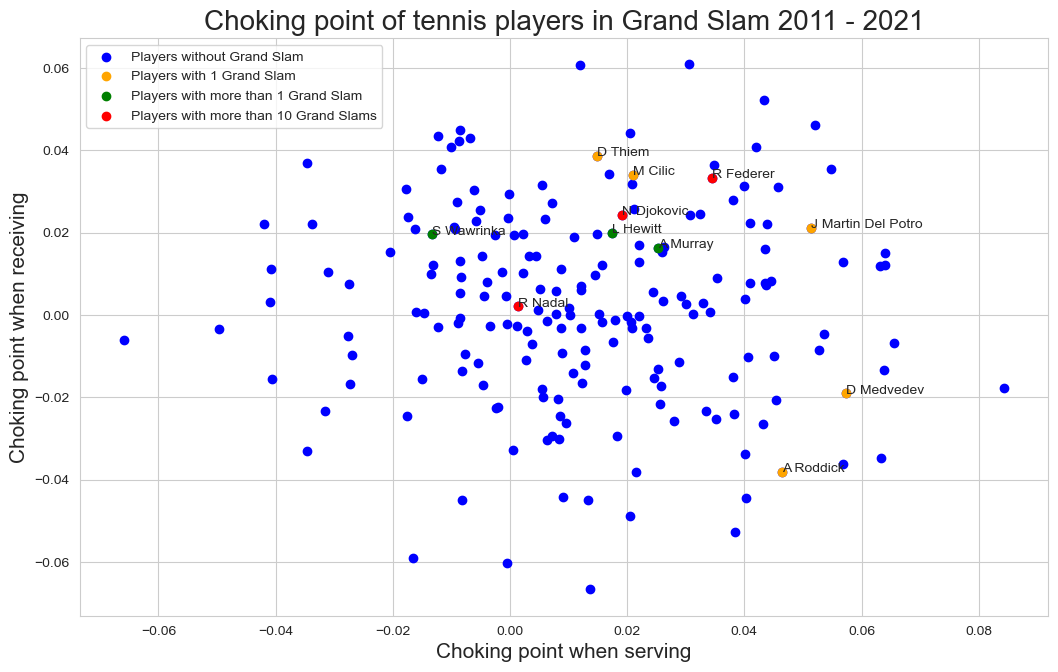

In [110]:
plt.rcParams["figure.figsize"] = (12.5,7.5)
plt.scatter(df.serve_choke_pct, df.receive_choke_pct, color="blue", label="Players without Grand Slam")
plt.scatter(df5.serve_choke_pct, df5.receive_choke_pct, color="orange", label="Players with 1 Grand Slam")
plt.scatter(df3.serve_choke_pct, df3.receive_choke_pct, color="green", label="Players with more than 1 Grand Slam")
plt.scatter(df4.serve_choke_pct, df4.receive_choke_pct, color="red", label="Players with more than 10 Grand Slams")
for i in range(df2.shape[0]):
    plt.annotate(df2.name.tolist()[i], (df2.serve_choke_pct.tolist()[i], df2.receive_choke_pct.tolist()[i]))
sns.set_style("whitegrid")
plt.xlabel("Choking point when serving", fontsize=15)
plt.ylabel("Choking point when receiving", fontsize=15)
plt.title("Choking point of tennis players in Grand Slam 2011 - 2021", fontsize=20)
plt.legend()
plt.savefig("../plots/choke.png")

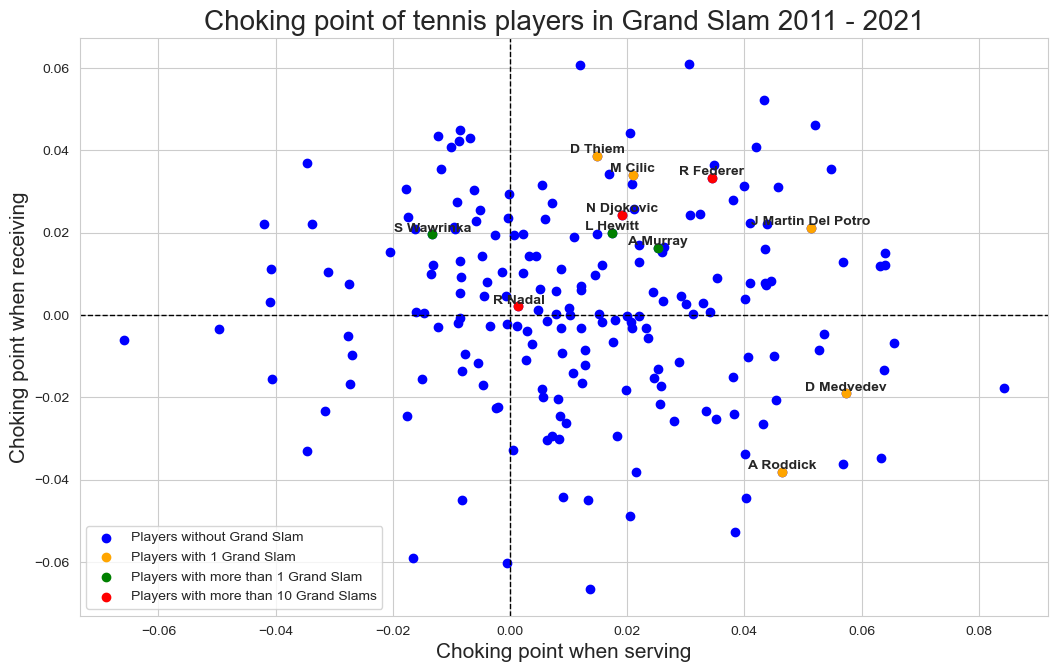

In [111]:
plt.figure(figsize=(12.5, 7.5), edgecolor='black')
plt.scatter(df.serve_choke_pct, df.receive_choke_pct, color="blue", label="Players without Grand Slam")
plt.scatter(df5.serve_choke_pct, df5.receive_choke_pct, color="orange", label="Players with 1 Grand Slam")
plt.scatter(df3.serve_choke_pct, df3.receive_choke_pct, color="green", label="Players with more than 1 Grand Slam")
plt.scatter(df4.serve_choke_pct, df4.receive_choke_pct, color="red", label="Players with more than 10 Grand Slams")
for i in range(df2.shape[0]):
    plt.annotate(df2.name.tolist()[i], (df2.serve_choke_pct.tolist()[i], df2.receive_choke_pct.tolist()[i]), fontsize=10, weight='bold', ha='center', va='bottom')
sns.set_style("whitegrid")
plt.xlabel("Choking point when serving", fontsize=15)
plt.ylabel("Choking point when receiving", fontsize=15)
plt.title("Choking point of tennis players in Grand Slam 2011 - 2021", fontsize=20)
plt.legend(prop={'size': 10}, loc=3)
plt.axhline(linewidth=1, color='black', linestyle='dashed')
plt.axvline(linewidth=1, color='black', linestyle='dashed')
plt.savefig("../plots/choke2.png")